# Linear Regression Using Scikit Learn

## Solution to The 1st Question of Sparks Foundation Internship Task

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data
What will be predicted score if a student study for 9.25 hrs in a day? 

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data from the link provided using pandas
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported")

df[:]

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<Figure size 504x360 with 0 Axes>

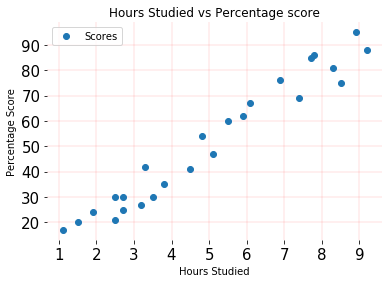

In [3]:
# Plotting the distribution of Hours studied and scores
plt.figure(figsize=(7,5))
diag=df.plot(x='Hours', y='Scores', style='o',fontsize=15) 
plt.title('Hours Studied vs Percentage score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.tick_params(bottom='off',left='off',labelleft='off',labelbottom='on')
plt.grid(color='red', linestyle='-', linewidth=0.25, alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [4]:
#sorting out the data in required form
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values 

### Training the model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,train_size=0.6)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [9.89775614]
linear model intercept (b): 1.101
R-squared score (training): 0.944
R-squared score (test): 0.957


### plotting the regression plot


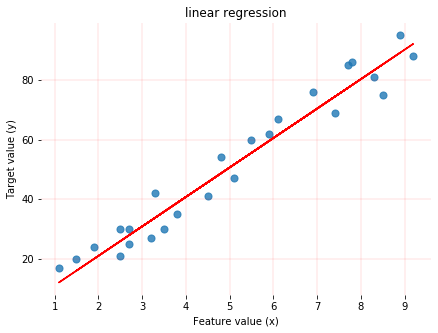

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(X, y, marker='o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid(color='red', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title('linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Making Predictions

In [7]:
print(X_test) # Testing data - In Hours
y_pred = linreg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]


In [8]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


In [9]:
# You can also test with your own data
hours =np.array([[9.25]])
own_pred = linreg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.65537184734602


### Evaluating the Model

In [10]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 


Mean Absolute Error: 4.894510863410609
Root Mean Squared Error: 5.102408224327238


### Trying other types og linear regression models to check which gives the best score and lowest error

# Trying Out Ridge Linear Regression

In [11]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,random_state=0)
linridge=Ridge(alpha=20.0).fit(X_train1,y_train1)
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train1, y_train1)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test1, y_test1)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 10.41360163563973
ridge regression linear model coeff:
[8.40116217]
R-squared score (training): 0.926
R-squared score (test): 0.914
Number of non-zero features: 1


In [12]:
linridge.score(X_test1,y_test1)

0.9140170652494727

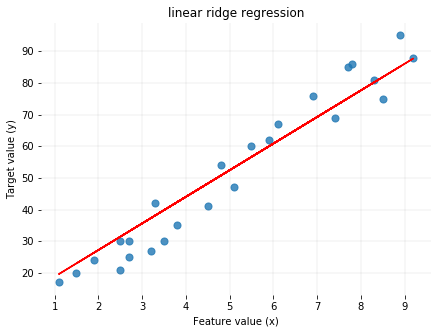

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(X, y, marker='o', s=50, alpha=0.8)
plt.plot(X, linridge.coef_ * X + linridge.intercept_, 'r-')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title('linear ridge regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [14]:
print(X_test1) # Testing data - In Hours
y_pred = linridge.predict(X_test1) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [15]:
df2 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,20,23.015345
1,27,37.297321
2,69,72.582202
3,30,31.416507
4,62,59.980458
5,35,42.338018
6,24,26.375810


In [16]:
# You can also test with your own data
hours =np.array([[9.25]])
own_pred = linridge.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 88.1243516625417


In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred))) 


Mean Absolute Error: 4.292106193601943
Root Mean Squared Error: 5.258127081644242


### Ridge Regression gives very similar results as Linear Regression

# Trying Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,random_state=0)
X_train_scaled=scaler.fit_transform(X_train2)
X_test_scaled=scaler.fit_transform(X_test2)
X_scaled=scaler.fit_transform(X)
linlasso=Lasso(alpha=2.0,max_iter=10000).fit(X_train_scaled,y_train2)
print('lasso regression linear model intercept:{}'
      .format(linlasso.intercept_))
print('lasso regression linear model coeff:{}'
      .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}\n'
     .format(linlasso.score(X_train_scaled, y_train2)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test2)))

lasso regression linear model intercept:24.646417929453712
lasso regression linear model coeff:[58.87203362]
Non-zero features: 1
R-squared score (training): 0.880

R-squared score (test): 0.693



In [19]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train2)
    r2_train = linlasso.score(X_train_scaled, y_train2)
    r2_test = linlasso.score(X_test_scaled, y_test2)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 1, r-squared training: 0.94, r-squared test: 0.64

Alpha = 1.00
Features kept: 1, r-squared training: 0.93, r-squared test: 0.68

Alpha = 2.00
Features kept: 1, r-squared training: 0.88, r-squared test: 0.69

Alpha = 3.00
Features kept: 1, r-squared training: 0.79, r-squared test: 0.60

Alpha = 5.00
Features kept: 1, r-squared training: 0.52, r-squared test: 0.10

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -1.07

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -1.07

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -1.07



In [20]:
linlasso = Lasso(alpha=2.00, max_iter = 10000).fit(X_train_scaled, y_train2)
print('lasso regression linear model intercept:{}'
      .format(linlasso.intercept_))
print('lasso regression linear model coeff:{}'.format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}\n'
     .format(linlasso.score(X_train_scaled, y_train2)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test2)))

lasso regression linear model intercept:24.646417929453712
lasso regression linear model coeff:[58.87203362]
Non-zero features: 1
R-squared score (training): 0.880

R-squared score (test): 0.693



In [21]:
linlasso.coef_*X_scaled

array([[10.17541322],
       [29.07260919],
       [15.26311983],
       [53.78432701],
       [17.44356552],
       [ 2.90726092],
       [58.87203362],
       [31.97987011],
       [52.33069655],
       [11.62904368],
       [47.96980517],
       [34.88713103],
       [24.71171781],
       [15.98993506],
       [ 0.        ],
       [56.69158793],
       [10.17541322],
       [ 5.81452184],
       [36.34076149],
       [45.78935948],
       [11.62904368],
       [26.8921635 ],
       [19.62401121],
       [42.15528333],
       [48.6966204 ]])

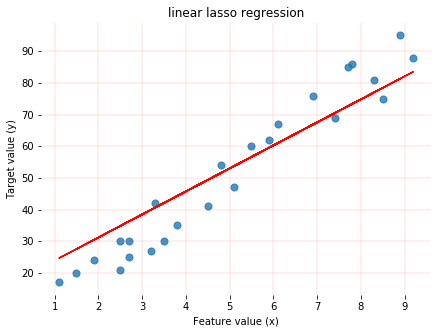

In [22]:
plt.figure(figsize=(7,5))
plt.scatter(X, y, marker='o', s=50, alpha=0.8)
plt.plot(X, linlasso.coef_*X_scaled + linlasso.intercept_, 'r-')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid(color='red', linestyle='solid', linewidth=0.25, alpha=0.5)
plt.title('linear lasso regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [23]:
print(X_test_scaled) # Testing data - In Hours
y_pred = linlasso.predict(X_test_scaled) # Predicting the scores

[[0.        ]
 [0.28813559]
 [1.        ]
 [0.16949153]
 [0.74576271]
 [0.38983051]
 [0.06779661]]


In [24]:
print(y_pred)

[24.64641793 41.60954626 83.51845155 34.62472871 68.55098537 47.59653273
 28.63774224]


In [25]:
df4 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred})  
df4

,Actual,Predicted
0,20,24.646418
1,27,41.609546
2,69,83.518452
3,30,34.624729
4,62,68.550985
5,35,47.596533
6,24,28.637742


In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred))) 


Mean Absolute Error: 8.883486399146049
Root Mean Squared Error: 9.930460295485178


In [27]:
# You can also test with your own data
hours =np.array([[9.25]])
print("No of Hours = {}".format(hours))
hours=hours/10
own_pred = linlasso.predict(hours)
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 79.10304902584998


#### Lasso Regression does not really work well with this data

## Using Polynomial feature for linear regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train3, y_train3)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train3, y_train3)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test3, y_test3)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train3, y_train3)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train3, y_train3)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test3, y_test3)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train3, y_train3)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train3, y_train3)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test3, y_test3)))

linear model coeff (w): [9.94167834]
linear model intercept (b): 1.932
R-squared score (training): 0.948
R-squared score (test): 0.937

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 0.         11.33067045 -0.12755471]
(poly deg 2) linear model intercept (b): -1.076
(poly deg 2) R-squared score (training): 0.949
(poly deg 2) R-squared score (test): 0.925


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2 + ridge) linear model coeff (w):
[0.         9.00662485 0.07828511]
(poly deg 2 + ridge) linear model intercept (b): 4.233
(poly deg 2 + ridge) R-squared score (training): 0.947
(poly deg 2 + ridge) R-squared score (test): 0.943


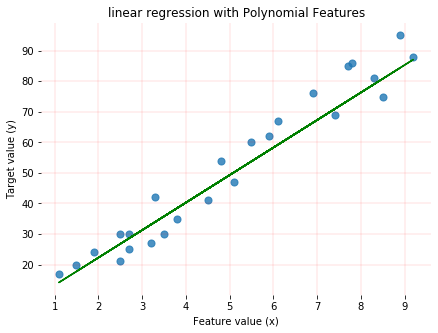

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(X, y, marker='o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_[1]*X+ linreg.intercept_, 'g-',linestyle='solid')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid(color='red', linestyle='solid', linewidth=0.25, alpha=0.5)
plt.title('linear regression with Polynomial Features')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [30]:
print(X_test3) # Testing data - In Hours
y_pred = linreg.predict(X_test3) # Predicting the scores

[[ 1.    1.5   2.25]
 [ 1.    3.2  10.24]
 [ 1.    7.4  54.76]
 [ 1.    2.5   6.25]
 [ 1.    5.9  34.81]
 [ 1.    3.8  14.44]
 [ 1.    1.9   3.61]]


In [31]:
df3 = pd.DataFrame({'Actual': y_test3, 'Predicted': y_pred})  
df3

,Actual,Predicted
0,20,17.918999
1,27,33.855759
2,69,75.168837
3,30,27.238764
4,62,60.097112
5,35,39.588532
6,24,21.628117


In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred))) 


Mean Absolute Error: 3.8185908550029333
Root Mean Squared Error: 4.26467897660674


### From all the above methods the best one seems to be the linear regression with polynomial feature
### It has the lowest error and highest test score of all